In [362]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate


def get_intervals(start,stop,N_step):
    interval = []
    start_1 = start
    stop_1 = stop//N_step
    
    for i in range(N_step):
        interval.append(np.linspace(start_1,stop_1,N_step))
        start_1 = stop_1
        stop_1 += stop//N_step
    return(interval)
        



def get_plc(in_list):
    
    plc = np.array([])
    N = len(in_list)
    
    end_of_array = np.random.randn()*15
    
    for i in range(N):
        coeff = np.random.randn()
        dummy = np.array([end_of_array + coeff*i for i in in_list])
        end_of_array = dummy[-1]
        plc = np.concatenate((plc,dummy))
        
    return(plc)


def get_people(in_list):
    
    plc = np.array([])
    N = len(in_list)
    
    end_of_array = 0
    
    
    for i in range(N):
        coeff = np.random.randn()
        dummy = np.array([end_of_array + coeff*i for i in in_list])
        end_of_array = dummy[-1]
        plc = np.concatenate((plc,dummy))
        
    plc = np.abs(plc)
        
    return(plc)



день номер  0
===========================вы потребили: 33 кВч энергии за день
=====уровень дискомфорта по температуре: 1001 цельсий-минут за день
уровень дискомфорта по качеству воздуха: 118 ppm-часов за день
день номер  1
===========================вы потребили: 359 кВч энергии за день
=====уровень дискомфорта по температуре: 293 цельсий-минут за день
уровень дискомфорта по качеству воздуха: 946 ppm-часов за день
день номер  2
===========================вы потребили: 252 кВч энергии за день
=====уровень дискомфорта по температуре: 180 цельсий-минут за день
уровень дискомфорта по качеству воздуха: 719 ppm-часов за день
день номер  3
===========================вы потребили: 98 кВч энергии за день
=====уровень дискомфорта по температуре: 106 цельсий-минут за день
уровень дискомфорта по качеству воздуха: 1002 ppm-часов за день
день номер  4
===========================вы потребили: 14 кВч энергии за день
=====уровень дискомфорта по температуре: 19 цельсий-минут за день
уровень дискомфорта 

===========================вы потребили: 22 кВч энергии за день
=====уровень дискомфорта по температуре: 383 цельсий-минут за день
уровень дискомфорта по качеству воздуха: 1000 ppm-часов за день
день номер  41
===========================вы потребили: 312 кВч энергии за день
=====уровень дискомфорта по температуре: 95 цельсий-минут за день
уровень дискомфорта по качеству воздуха: 750 ppm-часов за день
день номер  42
===========================вы потребили: 7 кВч энергии за день
=====уровень дискомфорта по температуре: 261 цельсий-минут за день
уровень дискомфорта по качеству воздуха: 1001 ppm-часов за день
день номер  43
===========================вы потребили: 69 кВч энергии за день
=====уровень дискомфорта по температуре: 1001 цельсий-минут за день
уровень дискомфорта по качеству воздуха: 998 ppm-часов за день
день номер  44
===========================вы потребили: 15 кВч энергии за день
=====уровень дискомфорта по температуре: 0 цельсий-минут за день
уровень дискомфорта по качеству в

===========================вы потребили: 152 кВч энергии за день
=====уровень дискомфорта по температуре: 54 цельсий-минут за день
уровень дискомфорта по качеству воздуха: 1001 ppm-часов за день
день номер  81
===========================вы потребили: 19 кВч энергии за день
=====уровень дискомфорта по температуре: 63 цельсий-минут за день
уровень дискомфорта по качеству воздуха: 1003 ppm-часов за день
день номер  82
===========================вы потребили: 89 кВч энергии за день
=====уровень дискомфорта по температуре: 0 цельсий-минут за день
уровень дискомфорта по качеству воздуха: 662 ppm-часов за день
день номер  83
===========================вы потребили: 44 кВч энергии за день
=====уровень дискомфорта по температуре: 49 цельсий-минут за день
уровень дискомфорта по качеству воздуха: 153 ppm-часов за день
день номер  84
===========================вы потребили: 126 кВч энергии за день
=====уровень дискомфорта по температуре: 685 цельсий-минут за день
уровень дискомфорта по качеству во

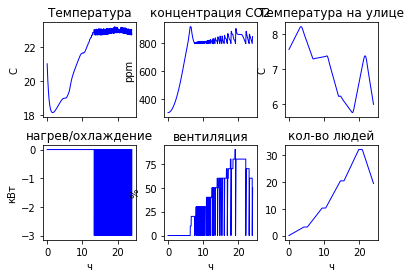

In [364]:
# CONTROLLER FUNCTION
def OnOff(T,T_prev, Co2,Co2_prev,  Noc, heat_regime_prev,cool_regime_prev,vent_regime_prev):
    """
    В данной функции необходимо реализовать логику управления:
        1) радиаторами отопления
        2) кондиционером
        3) вентиляцией

    Результат работы функции - переменные:
        1) heat_regime = 0,1,2,3 - режим работы радиаторов отопления от 0 до 3
        2) cool_regime = 0,1,2,3 - режим работы кондиционера от 0 до 3
        3) vent_regime = 0[выкл]...100 [макс.мощность] - режим работы вентиляции от 0 до 100%

    Для этого у Вас имеются следующие данные:
            (данные с сенсоров)
        T        - Температура в комнате [C]
        T_prev   - Температура минуту назад [C]
        Co2      - Содержание углекислого газа [ppm]
        Co2_prev - Содержание углекислого газа минуту назад [ppm]
        Noc      - Количество людей
            (текущий режим работы климатических устройств)
        heat_regime_prev - текущий режим работы радиатора отопления
        cool_regime_prev - текущий режим работы кондиционера
        vent_regime_prev - текущий режим работы вентиляции
    """
    # инициализация
    if (T<23 and T>20):
        heat_regime = 0
        cool_regime = 0
    else:
        heat_regime = heat_regime_prev
        cool_regime = cool_regime_prev

    if Co2 <800:
        vent_regime = 0
    else:
        vent_regime = vent_regime_prev

    # логика контроллера
    if T>23:
        heat_regime = 0
        if T>T_prev:
            cool_regime = min(cool_regime_prev+1,3)

    if T < 20:
        cool_regime = 0
        if T<T_prev:
            heat_regime = min(heat_regime_prev+1,3)

    if Co2 > 700:
        if Co2>Co2_prev:
            vent_regime = min(vent_regime_prev+10,100)

    if Noc < 5:
        heat_regime = 0
        cool_regime = 0
        vent_regime = 0
        if T<18:
            heat_regime = 1

    """
    окончание описания логики
    """
#    print(cool_regime,heat_regime,vent_regime)
    return cool_regime,heat_regime,vent_regime

# MICROCLIMATE DYNAMICS FUNCTION
def microclim(dtime, Tout, T, Noc, Co2, W, Q):
    m = 540     # air mass
    Cp = 1000   # air heat capacity
    T_next = T + dtime/m/Cp*( 55*(Tout-T) +
                              200*(21-T)  +
                              120*Noc     +
                              W           +
                              Cp*Q*(21-T) +
                              0.1*m/3600*Cp*(Tout-T))
    Co2_next = Co2 + dtime/m*(  (Q+0.1*m/3600)*(300-Co2) +
                                Noc*8 )
#    print(T_next, Co2_next)
    return T_next,Co2_next

# OCCUPANCY PROFILE
def occup(time, f_o):
    
    xp = np.linspace(0,25,25) 
             
    return np.interp(time, xp, f_o)

#out temperature profile
def outtemp(time, f_t):
    
    
    xp = np.linspace(0,25,49) 
            
    f = interpolate.interp1d(xp, f_t, "cubic")
    return f(time)

# ROLLONG HORIZON SIMULATION FUNCTION
def RH():
    stamp = []
    time = 0
    T_room = 21
    T_room_prev = 21
    
    f_oc = get_people(np.linspace(0,10,5))
    f_t = get_plc(np.linspace(0,2,7))
    
    
    Noc = occup(time,f_oc)
    Co2 = 300
    Co2_prev = 300
    HRP = 0
    CRP = 0
    VRP = 0
    Tout = outtemp(time,f_t)
    stamp.append([time, T_room, Noc, Co2, Tout,0,0])
    dtime = 60 #in seconds
    energy_consumed = 0.0
    comfort_penalty = 0.0
    comfort_penalty_co2 = 0.0
    
    array_for_learning =[]
    
    
    
    while time<24:
        time += dtime/3600
        Noc = occup(time,f_oc)
        Tout = outtemp(time,f_t)
        cool_regime,heat_regime,vent_regime = OnOff(T_room,T_room_prev, Co2,Co2_prev,  Noc, HRP,CRP,VRP)
        
        array_for_learning.append([T_room,T_room_prev, Co2,Co2_prev,  Noc, HRP,CRP,VRP,
                                   cool_regime,heat_regime,vent_regime])
        
        W = 3000*heat_regime-3000*cool_regime
        Q = 0.55/100*vent_regime
        T_room_prev = T_room
        Co2_prev = Co2
        HRP = heat_regime
        CRP = cool_regime
        VRP = vent_regime
        #print(HRP,CRP,VRP)
        T_room, Co2 = microclim(dtime, Tout, T_room_prev, Noc, Co2_prev, W, Q)

        stamp.append([time, T_room, Noc, Co2, Tout, W,Q])

        energy_consumed += (abs(W) + Q*1000*abs(21-Tout))*dtime/3600/1000
        if (T_room>24 and Noc>0):
            comfort_penalty += (T_room-24)*dtime/60
        if (T_room<20 and Noc>0):
            comfort_penalty += (20-T_room)*dtime/60
        if (Co2>800 and Noc>0):
            comfort_penalty_co2 += (Co2-800)*dtime/3600
            
        if comfort_penalty > 1000:
            array_for_learning = np.zeros(2)
            break
        if comfort_penalty_co2 > 1000:
            array_for_learning = np.zeros(2)
            break
        
    print("===========================вы потребили:",  "%0.0f" % energy_consumed, "кВч энергии за день" )
    print("=====уровень дискомфорта по температуре:", "%0.0f" % comfort_penalty, "цельсий-минут за день")
    print("уровень дискомфорта по качеству воздуха:", "%0.0f" % comfort_penalty_co2, "ppm-часов за день")
    #if comfort_penalty > 1000:
    #    array_for_learning = np.zeros_like(array_for_learning)
    #elif comfort_penalty_co2 > 1000:
    #    array_for_learning = np.zeros_like(array_for_learning)
        
    return(stamp,array_for_learning)

# main cycle

# словарь {акшн: стейт}
d = {}

#generating days with random smth inside
for i in range(100):
    
    print('день номер ', i)
    
    stamp,array_learn = RH()
    stamp = np.asarray(stamp)
    
    #a is array [state,action]
    if len(array_learn) < 5:
        continue
    else:
        a = np.array(array_learn)

    for i in range(a.shape[0]):
    
        s = tuple(a[i,-4:-1])
        d[s] = d.get(s,[])
        d[s] = np.concatenate((d[s],a[i,0:-4]))
    


f, axarr = plt.subplots(2, 3)
axarr[0, 0].plot(stamp[:,0], stamp[:,1], color='blue', linewidth=1)
axarr[0, 0].set_title('Температура')
axarr[0, 0].set_ylabel('C')
axarr[0, 1].plot(stamp[:,0], stamp[:,3], color='blue', linewidth=1)
axarr[0, 1].set_title('концентрация CO2')
axarr[0, 1].set_ylabel('ppm')
axarr[1, 0].plot(stamp[:,0], stamp[:,5]/1000, color='blue', linewidth=1)
axarr[1, 0].set_title('нагрев/охлаждение')
axarr[1, 0].set_ylabel('кВт')
axarr[1, 0].set_xlabel('ч')
axarr[1, 1].plot(stamp[:,0], stamp[:,6]/0.55*100, color='blue', linewidth=1)
axarr[1, 1].set_title('вентиляция')
axarr[1, 1].set_ylabel('%')
axarr[1, 1].set_xlabel('ч')
axarr[0, 2].plot(stamp[:,0], stamp[:,4], color='blue', linewidth=1)
axarr[0, 2].set_title('Температура на улице')
axarr[0, 2].set_ylabel('C')
axarr[1, 2].plot(stamp[:,0], stamp[:,2], color='blue', linewidth=1)
axarr[1, 2].set_title('кол-во людей')
axarr[1, 2].set_xlabel('ч')
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
f.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()

In [365]:
# сколько всего стейтов получилось по акшну (0,0,0)
print('number of states on action(0,0,0) = ',len(d[(0,0,0)])/7)
print()

#первый стейт по акшну (0,0,0)
print('first state on action (0,0,0) = ',d[(0,0,0)][0:7])
print()

#18 стейт по акшну (10,0,0)
N_state = 18
print('18th state on action (10,0,0) = ',d[(10,0,0)][7*N_state:7*N_state + 7])

number of states on action(0,0,0) =  12034.0

first state on action (0,0,0) =  [2.10000000e+01 2.10000000e+01 3.00000000e+02 3.00000000e+02
 3.46121196e-02 0.00000000e+00 0.00000000e+00]

18th state on action (10,0,0) =  [ 21.88718041  21.8366095  846.31279957 824.49526523  29.23229005
   0.           0.        ]


In [366]:
print(len(d.keys()))
print(d.keys())

32
dict_keys([(0.0, 0.0, 0.0), (0.0, 0.0, 1.0), (10.0, 0.0, 1.0), (20.0, 0.0, 0.0), (10.0, 0.0, 0.0), (20.0, 0.0, 1.0), (30.0, 0.0, 0.0), (30.0, 0.0, 1.0), (40.0, 0.0, 1.0), (40.0, 0.0, 0.0), (50.0, 0.0, 0.0), (50.0, 0.0, 1.0), (60.0, 0.0, 0.0), (70.0, 0.0, 0.0), (80.0, 0.0, 0.0), (90.0, 0.0, 0.0), (100.0, 0.0, 0.0), (100.0, 1.0, 0.0), (30.0, 1.0, 0.0), (70.0, 1.0, 0.0), (80.0, 1.0, 0.0), (90.0, 1.0, 0.0), (0.0, 1.0, 0.0), (60.0, 1.0, 0.0), (10.0, 1.0, 0.0), (50.0, 1.0, 0.0), (60.0, 0.0, 1.0), (40.0, 1.0, 0.0), (20.0, 1.0, 0.0), (100.0, 2.0, 0.0), (0.0, 2.0, 0.0), (30.0, 2.0, 0.0)])
